<a href="https://colab.research.google.com/github/lizchase/Python-Capstone-Project/blob/main/Capstone_Citi_Bike_Analysis_Liz_Chase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
path = '/content/drive/MyDrive/Colab Notebooks/Python Course/202308-citibike-tripdata.csv'
df = pd.read_csv(path, low_memory=False)


**Data Exploration**

In [ ]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,C5E94016E7939757,classic_bike,2023-08-29 21:15:27,2023-08-29 21:51:04,Lexington Ave & E 36 St,6313.10,Amsterdam Ave & W 125 St,7800.03,40.747574,-73.978801,40.813358,-73.956461,member
1,E88D94798ABBBD7C,classic_bike,2023-08-06 19:03:35,2023-08-06 19:04:56,Rockaway Ave & Bainbridge St,4285.09,MacDougal St & Rockaway Ave,4212.01,40.683236,-73.911943,40.680180,-73.911360,member
2,341D3CE4743A92EC,classic_bike,2023-08-02 20:34:04,2023-08-02 20:40:19,W 13 St & 5 Ave,5947.04,E 10 St & 2 Ave,5746.02,40.735445,-73.994310,40.729708,-73.986598,member
3,21C763DECA96FD02,classic_bike,2023-08-14 13:47:23,2023-08-14 14:17:36,Central Park North & Adam Clayton Powell Blvd,7617.07,5 Ave & E 29 St,6248.06,40.799484,-73.955613,40.745168,-73.986831,member
4,A8533C28598A6AB8,classic_bike,2023-08-03 13:05:09,2023-08-03 13:52:27,W 13 St & 5 Ave,5947.04,Amsterdam Ave & W 125 St,7800.03,40.735445,-73.994310,40.813358,-73.956461,member


In [ ]:
df.count()

# Data looks fairly clean so far, but this data set is massive.

ride_id               4093169
rideable_type         4093169
started_at            4093169
ended_at              4093169
start_station_name    4091977
start_station_id      4091977
end_station_name      4083724
end_station_id        4083724
start_lat             4093169
start_lng             4093169
end_lat               4090221
end_lng               4090221
member_casual         4093169
dtype: int64

In [ ]:
df.isnull().sum()

#All NaN data is in the station start/end columns.

ride_id                  0
rideable_type            0
started_at               0
ended_at                 0
start_station_name    1192
start_station_id      1192
end_station_name      9445
end_station_id        9445
start_lat                0
start_lng                0
end_lat               2948
end_lng               2948
member_casual            0
dtype: int64

In [ ]:
df.groupby(['member_casual'])['ride_id'].count()

#Number of rides taken by members and casual riders.

member_casual
casual     907197
member    3185972
Name: ride_id, dtype: int64

In [ ]:
df.groupby(['rideable_type'])['ride_id'].count()

#Number of rides on classic bikes vs e-bikes.

rideable_type
classic_bike     3784828
electric_bike     308341
Name: ride_id, dtype: int64

In [ ]:
df.nunique()

#There is a bit of discrepancy in the station name and id data with more end stations than start stations.
#This discrepancy is a result of some rides ending in Jersey City, while all data initiates at one of the stations in the 5 boroughs.

ride_id               4093169
rideable_type               2
started_at            1751380
ended_at              1757220
start_station_name       1954
start_station_id         1955
end_station_name         1995
end_station_id           1996
start_lat              885055
start_lng              724338
end_lat                  2029
end_lng                  2025
member_casual               2
dtype: int64

**Questions**

What is the breakdown of member vs casual rides?   

What are the most common trips for each group? What can we infer from the types of trips users are taking?

**Data Cleaning**

In [ ]:
df2 = df.dropna(how='any')
df2.count()

#Dropping all rows with NaN.
#These are rides where there is no start or end data.
#End data could be missing due to an improperly docked bike or bike theft.

ride_id               4083172
rideable_type         4083172
started_at            4083172
ended_at              4083172
start_station_name    4083172
start_station_id      4083172
end_station_name      4083172
end_station_id        4083172
start_lat             4083172
start_lng             4083172
end_lat               4083172
end_lng               4083172
member_casual         4083172
dtype: int64

In [ ]:
df3 = df2[['ride_id', 'rideable_type', 'start_station_name', 'start_station_id', 'end_station_name', 'end_station_id', 'member_casual' ]] #Reducing the number of columns
df3.head()

#Reducing number of columns.

,ride_id,rideable_type,start_station_name,start_station_id,end_station_name,end_station_id,member_casual
0,C5E94016E7939757,classic_bike,Lexington Ave & E 36 St,6313.10,Amsterdam Ave & W 125 St,7800.03,member
1,E88D94798ABBBD7C,classic_bike,Rockaway Ave & Bainbridge St,4285.09,MacDougal St & Rockaway Ave,4212.01,member
2,341D3CE4743A92EC,classic_bike,W 13 St & 5 Ave,5947.04,E 10 St & 2 Ave,5746.02,member
3,21C763DECA96FD02,classic_bike,Central Park North & Adam Clayton Powell Blvd,7617.07,5 Ave & E 29 St,6248.06,member
4,A8533C28598A6AB8,classic_bike,W 13 St & 5 Ave,5947.04,Amsterdam Ave & W 125 St,7800.03,member


In [ ]:
df_members = df3.loc[(df['member_casual'] == 'member')]
df_members.count()

#Creates data set for members only. Members took 3,180,113 trips.

ride_id               3180113
rideable_type         3180113
start_station_name    3180113
start_station_id      3180113
end_station_name      3180113
end_station_id        3180113
member_casual         3180113
dtype: int64

In [ ]:
df_casual = df3.loc[(df['member_casual'] == 'casual')]
df_casual.count()

#Creates data set for casual riders (non-members) only.  Non-members took only 903,059 trips.

ride_id               903059
rideable_type         903059
start_station_name    903059
start_station_id      903059
end_station_name      903059
end_station_id        903059
member_casual         903059
dtype: int64

**Analysis**

In [ ]:
bike_counts = df3.groupby(['rideable_type','member_casual'])['ride_id'].aggregate('count')
bike_pivot = bike_counts.unstack()
bike_pivot

#Pivot table of ride counts by member status and bike type.
#Members and causal riders use e-bikes at the same rate.

member_casual,casual,member
rideable_type,,
classic_bike,829079,2946132
electric_bike,73980,233981


In [ ]:
df3[['start_station_name','end_station_name']].\
     value_counts().count()

#Shows the number of unique trips taken.

612721

In [ ]:
trips = df3.value_counts(['start_station_name','end_station_name'])[:20]
trips

#Shows the top 20 trips for all riders.
#There are a lot of trips that start and end in the same location.

start_station_name                 end_station_name                 
7 Ave & Central Park South         7 Ave & Central Park South           1882
Central Park S & 6 Ave             Central Park S & 6 Ave               1389
Grand Army Plaza & Central Park S  Grand Army Plaza & Central Park S    1357
Dock St & Front St                 Old Fulton St                        1299
Broadway & W 58 St                 Broadway & W 58 St                   1173
Yankee Ferry Terminal              Yankee Ferry Terminal                1113
Old Fulton St                      Dock St & Front St                   1073
Roosevelt Island Tramway           Roosevelt Island Tramway             1035
West St & Chambers St              West St & Chambers St                 988
Old Slip & South St                South St & Gouverneur Ln              944
Centre St & Chambers St            Centre St & Chambers St               941
Central Park West & W 68 St        Central Park West & W 68 St           916
11 Ave 

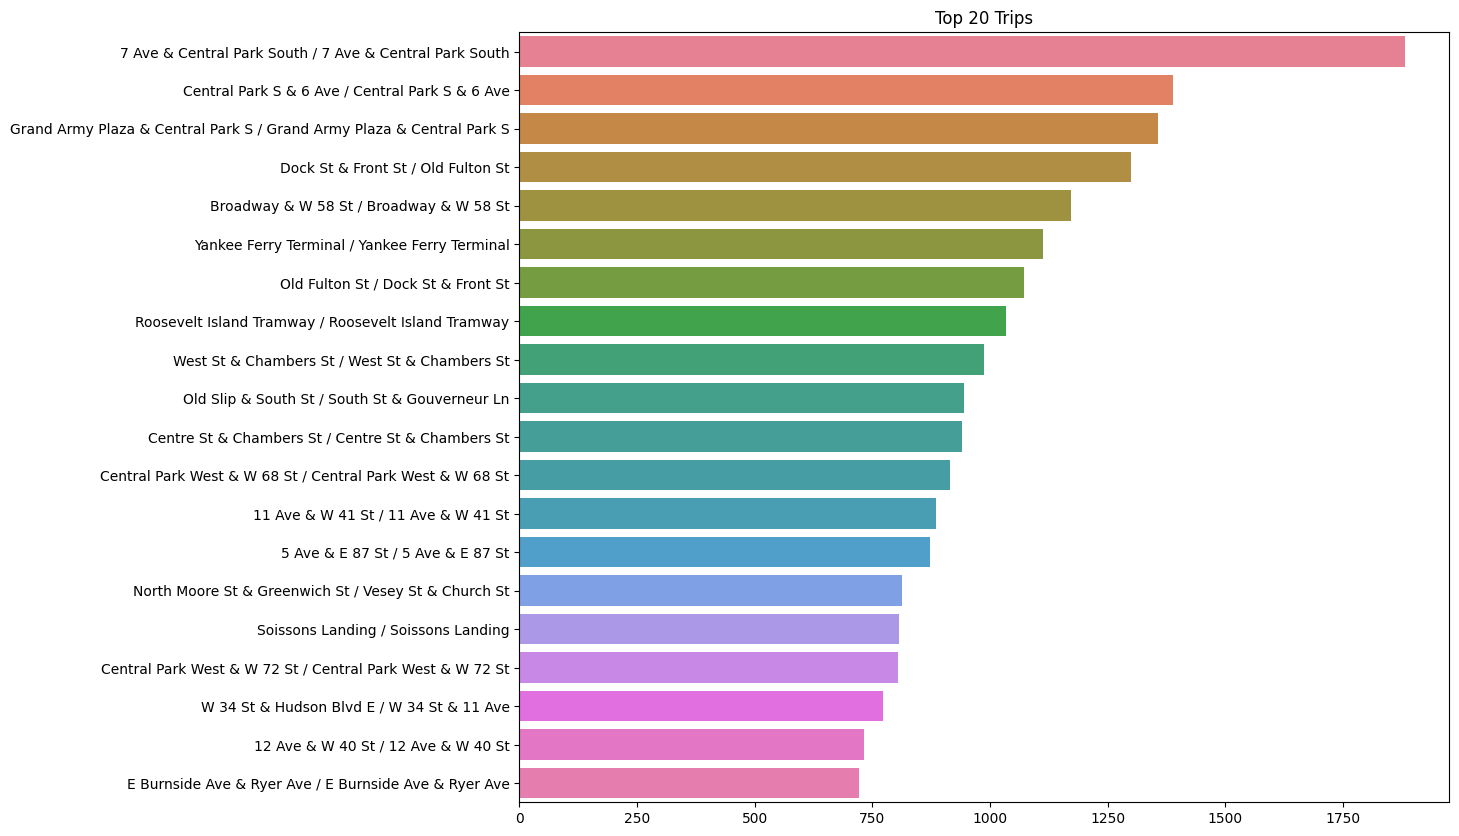

In [ ]:
trip_names=[trips.index[t][0] + ' / ' + trips.index[t][1] for t in range(len(trips))]

plt.figure(figsize=(12,10))
plt.title('Top 20 Trips')
with plt.style.context("seaborn-v0_8-muted"):
  sns.barplot( x= list(trips.values), y = trip_names, orient="h", hue=trip_names)

#Plots top 20 trips for all riders.

In [ ]:
trips_loopless = df3[df3['start_station_name'] != df3['end_station_name']].\
  value_counts(['start_station_name','end_station_name'])[:20]
trips_loopless

#Shows the top 20 trips for all riders not including loops (where start and end station are the same).

start_station_name             end_station_name             
Dock St & Front St             Old Fulton St                    1299
Old Fulton St                  Dock St & Front St               1073
Old Slip & South St            South St & Gouverneur Ln          944
North Moore St & Greenwich St  Vesey St & Church St              813
W 34 St & Hudson Blvd E        W 34 St & 11 Ave                  772
11 Ave & W 41 St               W 34 St & Hudson Blvd E           712
St Marks Pl & 2 Ave            St Marks Pl & 1 Ave               700
8 Ave & W 33 St                W 35 St & 8 Ave                   681
River Ter & Warren St          Vesey Pl & River Terrace          665
Vesey St & Church St           North Moore St & Greenwich St     665
W 56 St & 6 Ave                W 55 St & 6 Ave                   608
Yankee Ferry Terminal          Soissons Landing                  603
West St & Chambers St          Pier 40 - Hudson River Park       583
1 Ave & E 62 St                1 Ave & E 6

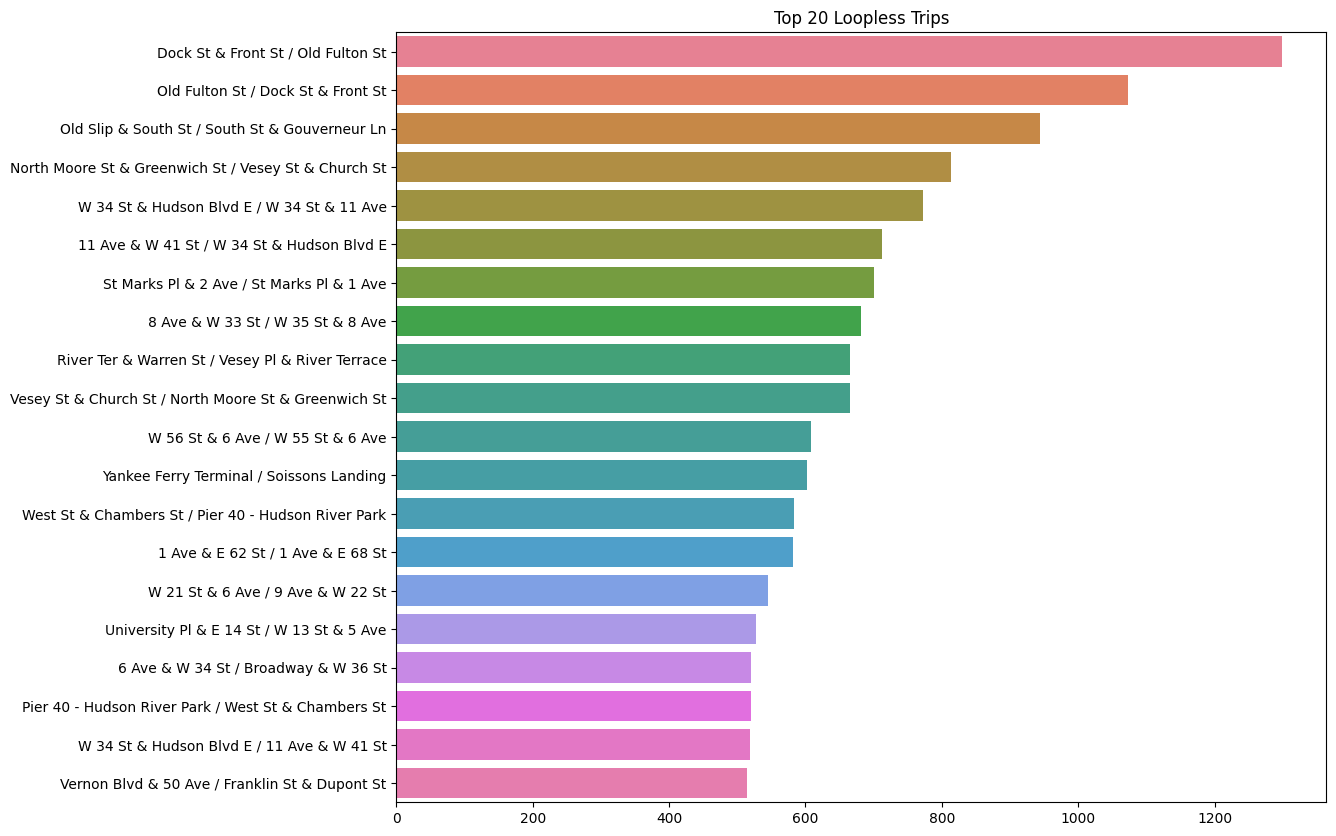

In [ ]:
trip_names_loopless=[trips_loopless.index[t][0] + ' / ' + trips_loopless.index[t][1] for t in range(len(trips))]

plt.figure(figsize=(12,10))
plt.title('Top 20 Loopless Trips')
with plt.style.context("seaborn-v0_8-muted"):
  sns.barplot( x= list(trips_loopless.values), y = trip_names_loopless, orient="h", hue=trip_names_loopless)

#Plots the top 20 trips for all riders not including loops.

In [ ]:
trips_members = df_members.value_counts(['start_station_name','end_station_name'])[:20]
print(trips_members)

#Shows top 20 trips made by members.

start_station_name             end_station_name             
Dock St & Front St             Old Fulton St                    1277
Old Fulton St                  Dock St & Front St               1042
Old Slip & South St            South St & Gouverneur Ln          940
North Moore St & Greenwich St  Vesey St & Church St              770
W 34 St & Hudson Blvd E        W 34 St & 11 Ave                  742
11 Ave & W 41 St               11 Ave & W 41 St                  715
E Burnside Ave & Ryer Ave      E Burnside Ave & Ryer Ave         697
St Marks Pl & 2 Ave            St Marks Pl & 1 Ave               696
8 Ave & W 33 St                W 35 St & 8 Ave                   676
Grand Concourse & E 166 St     Grand Concourse & E 166 St        672
River Ter & Warren St          Vesey Pl & River Terrace          646
11 Ave & W 41 St               W 34 St & Hudson Blvd E           645
Vesey St & Church St           North Moore St & Greenwich St     620
Grand Concourse & E 164 St     Grand Conco

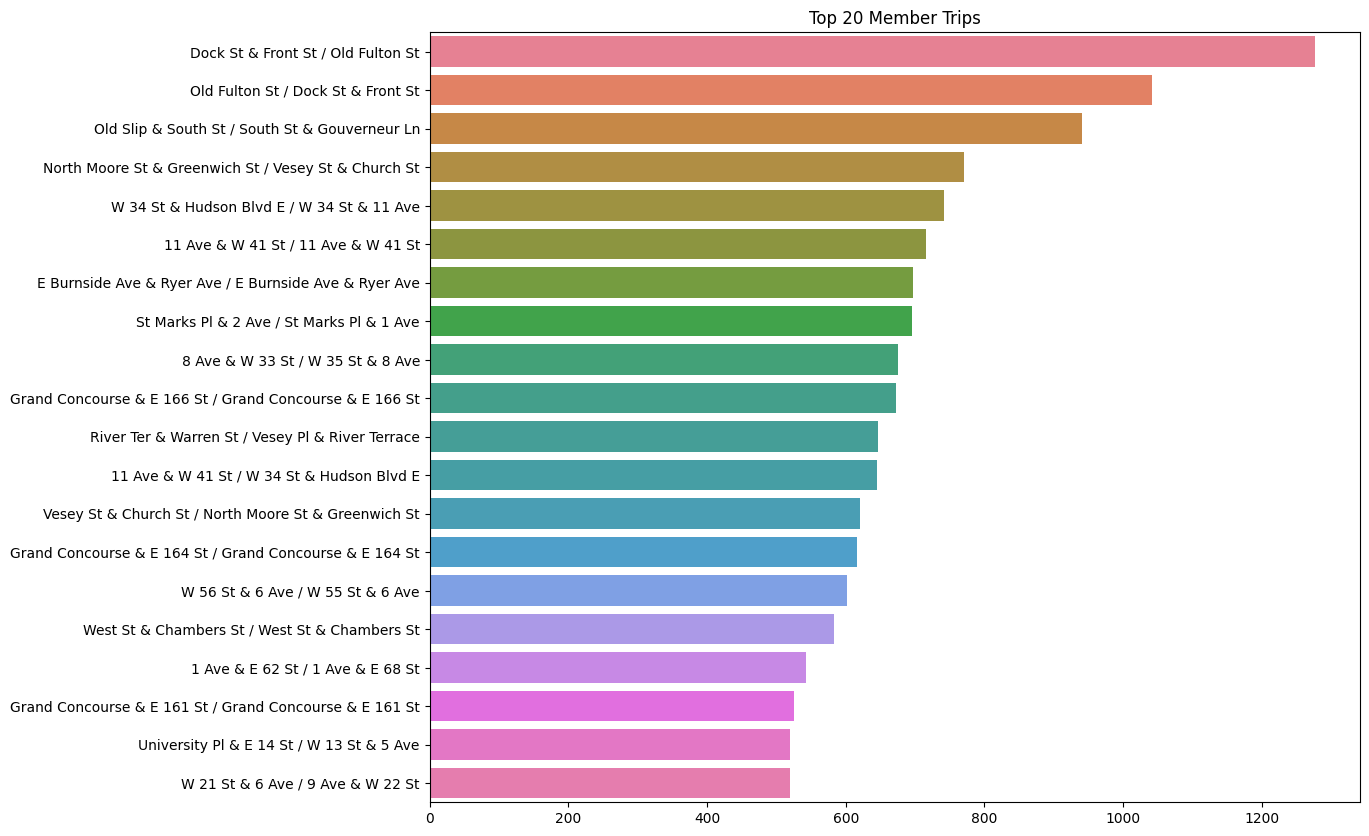

In [ ]:
trip_names_members=[trips_members.index[t][0] + ' / ' + trips_members.index[t][1] for t in range(len(trips))]

plt.figure(figsize=(12,10))
plt.title('Top 20 Member Trips')
with plt.style.context("seaborn-v0_8-muted"):
  sns.barplot( x= list(trips_members.values), y = trip_names_members, orient="h", hue=trip_names_members )

#Plots top 20 member trips.

In [ ]:
trips_casual = df_casual.value_counts(['start_station_name','end_station_name'])[:20]
print(trips_casual)

#Shows top 20 trips made by casual riders.

start_station_name                 end_station_name                 
7 Ave & Central Park South         7 Ave & Central Park South           1543
Central Park S & 6 Ave             Central Park S & 6 Ave               1084
Grand Army Plaza & Central Park S  Grand Army Plaza & Central Park S     979
Roosevelt Island Tramway           Roosevelt Island Tramway              782
Yankee Ferry Terminal              Yankee Ferry Terminal                 697
Centre St & Chambers St            Centre St & Chambers St               674
Broadway & W 58 St                 Broadway & W 58 St                    659
5 Ave & E 87 St                    5 Ave & E 87 St                       630
Soissons Landing                   Soissons Landing                      571
Central Park West & W 68 St        Central Park West & W 68 St           549
Central Park West & W 72 St        Central Park West & W 72 St           536
5 Ave & E 78 St                    5 Ave & E 78 St                       489
Central

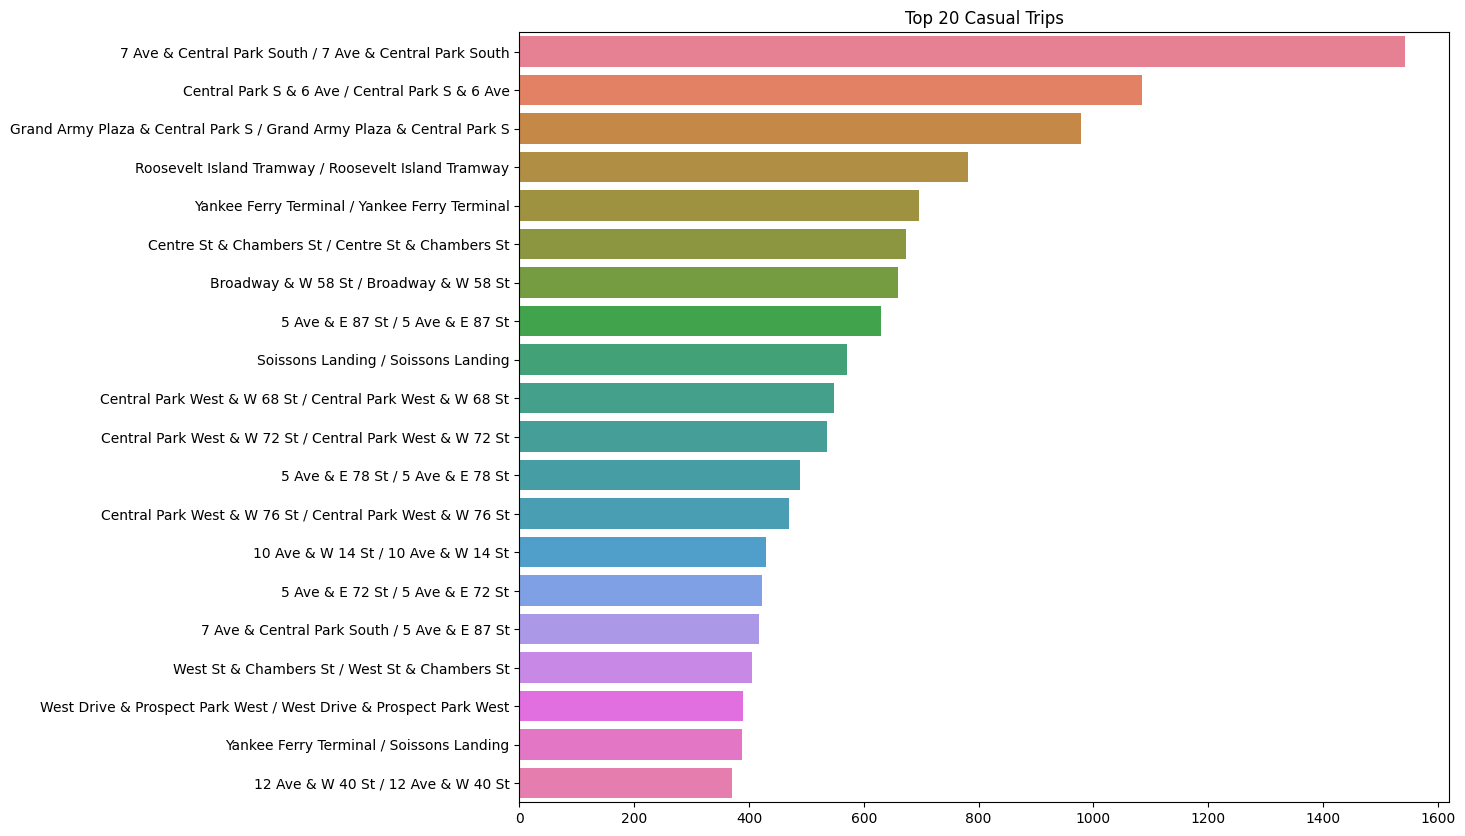

In [ ]:
trip_names_casual=[trips_casual.index[t][0] + ' / ' + trips_casual.index[t][1] for t in range(len(trips))]

plt.figure(figsize=(12,10))
plt.title('Top 20 Casual Trips')
with plt.style.context("seaborn-v0_8-muted"):
  sns.barplot( x= list(trips_casual.values), y = trip_names_casual, orient="h", hue=trip_names_casual)

#Plots top 20 casual trips.

**Conclusion**

Of the 4,093,169 rides in August 2023, 78% were taken by members and 22% were casual riders. Only 7.5% of rides were on e-bikes. However, members and casual riders used e-bikes at about the same rates with 7.35% and 8.35% usage accordingly.

There were 612,721 unique trips or routes taken. Of these routes, 15 of the top 20 started and ended at the same station (loops) and most are in popular tourist and recreation areas. The three most popular trips start and end right outside of Central Park. Other popular trips include loops on Governor's Island, Roosevelt Island, and other loops through Central Park.

Looking at the top trips that do no include loops, many trips still have start/end stations that are relatively close together. For example Dock St & Front St and Old Fulton St stations are in and around Brooklyn Bridge Park.

Breaking the trip data down in member and casual ridership groups, it is apparent that casual riders are taking the majority of the loop trips. These trips are also all within Manhattan (which includes Governor's Island and Roosevelt Island) and include mostly tourist areas.  This implies that casual riders are most likely using Citi Bike as a form of recreation in these scenarios.  

Members are taking some loop trips, but appear to be mostly going short distances with different start and end locations.  This implies that members are using bikes as a mode of transportation, rather than recreation. Also, members have top trips that do not begin or end in Manhattan.



**Limitations**

The number of columns/attributes for this data set are limited.  Citi Bike no longer includes demographic data (age, sex) or ride time and distance data, which also would have been worth exploring.  

There is also no neighborhood or borough information included in the data set. To take the analysis further, I could generate the borough based on the coordinates provided for each ride.  

It would have been interesting to compare rides over all of 2023, but I'm unfortunately limited by file size.  

**References**

Data set: https://s3.amazonaws.com/tripdata/index.html

https://ride.citibikenyc.com/blog/100million

https://help.citibikenyc.com/hc/en-us/articles/360039406631-Riding-with-an-ebike

https://mot-marketing-whitelabel-prod.s3.amazonaws.com/nyc/August-2023-Citi-Bike-Monthly-Report.pdf

https://citibikenyc.com/pricing

https://ny1.com/nyc/all-boroughs/transit/2023/05/26/citi-bikes-celebrates-10-years-in-new-york-city

https://www.statology.org/pandas-count-unique-combinations-of-two-columns/
